In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%load_ext rpy2.ipython

In [3]:
%%R
df_X_train = read.csv('/content/drive/MyDrive/Research Trends/Data/df_X_train.csv')
df_X_test = read.csv('/content/drive/MyDrive/Research Trends/Data/df_X_test.csv')
df_y_train = read.csv('/content/drive/MyDrive/Research Trends/Data/df_y_train.csv')
df_y_test = read.csv('/content/drive/MyDrive/Research Trends/Data/df_y_test.csv')

In [8]:
%%R
head(df_X_train,5)

  LIMIT_BAL SEX EDUCATION MARRIAGE AGE PAY_0 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6
1    160000   2         2        2  32     0     0     0     0     0     0
2    100000   2         1        2  30     0     0     0     0     2     0
3     80000   1         1        2  29     0     0     0     0     0     0
4     20000   2         2        1  27     0     0    -1    -1    -2    -2
5     50000   2         1        2  30    -2    -2    -2    -2    -2    -2
  BILL_AMT1 BILL_AMT2 BILL_AMT3 BILL_AMT4 BILL_AMT5 BILL_AMT6 PAY_AMT1 PAY_AMT2
1    156098    156259    155404    153234    156731    155818     6000     6000
2     28383     32903     42283     51539     50583     52588     5000    10000
3     73722     75323     64277     45455     42231     42804     3300     2500
4      7286      2160       780         0         0         0     1006      780
5         0      2070         0         0         0         0     2070        0
  PAY_AMT3 PAY_AMT4 PAY_AMT5 PAY_AMT6
1     5600     6000     6000    

In [5]:
%%R
# Install and load the xgboost package
install.packages("xgboost")
library(xgboost)

(as ‘lib’ is unspecified)







	‘/tmp/RtmpmWqomu/downloaded_packages’



In [11]:
%%R
print(nrow(df_X_train))
print(nrow(df_y_train))

[1] 21000
[1] 21000


In [15]:
%%R
print(sum(colSums(is.na(df_X_train))))
print(sum(colSums(is.na(df_y_train))))

[1] 0
[1] 0


In [16]:
%%R
# Convert the data to DMatrix format
dtrain <- xgb.DMatrix(data = as.matrix(df_X_train), label = as.matrix(df_y_train))
dtest <- xgb.DMatrix(data = as.matrix(df_X_test), label = as.matrix(df_y_test))

In [17]:
%%R
# Set hyperparameters (customize based on your problem)
params <- list(
  objective = "binary:logistic",  # for binary classification
  eval_metric = "logloss",        # log loss as the evaluation metric
  max_depth = 3,                  # maximum depth of a tree
  eta = 0.3,                      # learning rate
  subsample = 0.8,                # fraction of observations to randomly sample for each tree
  colsample_bytree = 0.8          # fraction of features to randomly sample for each tree
)

In [18]:
%%R
# Train the XGBoost model
xgb_model <- xgboost(params = params, data = dtrain, nrounds = 100, verbose = 1)

[1]	train-logloss:0.578121 
[2]	train-logloss:0.521553 
[3]	train-logloss:0.484487 
[4]	train-logloss:0.462378 
[5]	train-logloss:0.450548 
[6]	train-logloss:0.441407 
[7]	train-logloss:0.435418 
[8]	train-logloss:0.431631 
[9]	train-logloss:0.429044 
[10]	train-logloss:0.427171 
[11]	train-logloss:0.425893 
[12]	train-logloss:0.424658 
[13]	train-logloss:0.423405 
[14]	train-logloss:0.422630 
[15]	train-logloss:0.421441 
[16]	train-logloss:0.420765 
[17]	train-logloss:0.420120 
[18]	train-logloss:0.419303 
[19]	train-logloss:0.418498 
[20]	train-logloss:0.417848 
[21]	train-logloss:0.417313 
[22]	train-logloss:0.416662 
[23]	train-logloss:0.416098 
[24]	train-logloss:0.415493 
[25]	train-logloss:0.415124 
[26]	train-logloss:0.414849 
[27]	train-logloss:0.413998 
[28]	train-logloss:0.413683 
[29]	train-logloss:0.413035 
[30]	train-logloss:0.412831 
[31]	train-logloss:0.412518 
[32]	train-logloss:0.412045 
[33]	train-logloss:0.411526 
[34]	train-logloss:0.411222 
[35]	train-logloss:0.41

In [19]:
%%R
# Make predictions on the test set
pred_probs <- predict(xgb_model, dtest)

In [21]:
%%R
install.packages("caret")
library(caret)

(as ‘lib’ is unspecified)











































































































































	‘/tmp/RtmpmWqomu/downloaded_packages’





In [27]:
%%R
# Create a confusion matrix
actual_labels <- df_y_test$default.payment.next.month
conf_matrix <- table(Predicted = as.numeric(pred_probs > 0.5), actual_labels)

In [28]:
%%R

print(conf_matrix)

         actual_labels
Predicted    0    1
        0 6640 1284
        1  369  707


In [41]:
%%R
install.packages("DALEX")
install.packages("DALEXtra")

(as ‘lib’ is unspecified)







	‘/tmp/RtmpmWqomu/downloaded_packages’

(as ‘lib’ is unspecified)







	‘/tmp/RtmpmWqomu/downloaded_packages’



In [42]:
%%R
# Load required packages
library(DALEX)
library(DALEXtra)

In [44]:
%%R

# Create a DALEX explainer
explainer <- DALEX::explain(model = xgb_model,
                            data = as.matrix(df_X_test),
                            y = as.numeric(df_y_test$default.payment.next.month),
                            label = "XGBoost Model",
                            verbose = FALSE)

In [45]:
%%R

# Generate variable importance plot
vi_plot <- variable_importance(explainer)

In [47]:
%%R

# Print the variable importance plot
print(vi_plot)

       variable mean_dropout_loss         label
1  _full_model_         0.2205797 XGBoost Model
2           SEX         0.2213225 XGBoost Model
3         PAY_6         0.2213239 XGBoost Model
4           AGE         0.2217023 XGBoost Model
5     EDUCATION         0.2218112 XGBoost Model
6      PAY_AMT5         0.2222891 XGBoost Model
7     BILL_AMT2         0.2223289 XGBoost Model
8      MARRIAGE         0.2224139 XGBoost Model
9     BILL_AMT6         0.2224478 XGBoost Model
10    BILL_AMT5         0.2227627 XGBoost Model
11        PAY_4         0.2228879 XGBoost Model
12        PAY_5         0.2230737 XGBoost Model
13    BILL_AMT4         0.2233121 XGBoost Model
14     PAY_AMT6         0.2241031 XGBoost Model
15        PAY_3         0.2248684 XGBoost Model
16        PAY_2         0.2251166 XGBoost Model
17     PAY_AMT4         0.2256216 XGBoost Model
18    BILL_AMT3         0.2257754 XGBoost Model
19     PAY_AMT2         0.2273659 XGBoost Model
20     PAY_AMT3         0.2290501 XGBoos

In [48]:
%%R
# Load the ggplot2 library
library(ggplot2)

In [60]:
%%R
#print(vi_plot$dropout_loss)
# Sort the dataframe by mean_dropout_loss in ascending order
vi_plot_sorted <- vi_plot[order(vi_plot$dropout_loss), ]

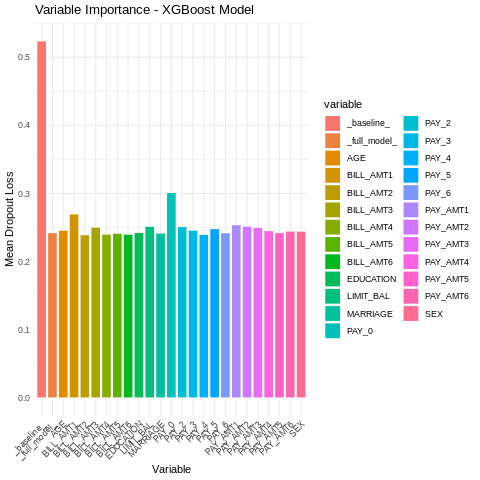

In [65]:
%%R
ggplot(vi_plot_sorted, aes(x = variable, y = dropout_loss, fill = variable)) +
  geom_bar(stat = "identity", position = "dodge", color = "white") +
  labs(x = "Variable", y = "Mean Dropout Loss", title = "Variable Importance - XGBoost Model") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [69]:
%%R
saveRDS(xgb_model, file = "/content/drive/MyDrive/Research Trends/Models/model.rds")